# <font color='red'>Basic Analytics Applied to Training Set of Heroes of the Storm Game Data</font>

## Brief overview of the game

The game is played with 10 players, separated into 2 teams of 5.

Each player selects a playable character (Hero) to take control of for the duration of the game

Based on the class that that Hero belongs to, they will have different traits, strengths and weaknesses.

The classes that can be chosen from is illustrated in the following diagram, where the lowest tier represents the individual character names:

<img src="HOTSFlow.png">

### 1. Determine the most played heroes in each category:
* Support
* Assassin
* Warrior
* Specialist

### 2. Identify an various team compositions played

### 3. Study the effect of team rating on the outcome of the game?

### 4. Is the team composition affecting the outcome of the game?

# Data Gathering

Data was collected from http://www.hotslogs.com/Default, a site containing large amounts of historical data on games played.
- Data was readily available in CSV format
- CSV files were available for individual player records, as well as per game records, and also information on the maps
- Different data was stored in each CSV file

Our first step is to load each CSV file into a pandas dataframe

In [3]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sys

%matplotlib inline
#using files to format dataframe display
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

#load both csv files into tow respective dataframes
DF_Replay = pd.read_csv("TSReplay.csv")

DF_Characters = pd.read_csv("TSCharacters.csv")

DF_Map_Groups = pd.read_csv("HeroAndMap.csv")

In [4]:
DF_Replay.head(2)

,ReplayID,GameMode(3=Quick Match 4=Hero League 5=Team League),Map,Replay Length,Timestamp (UTC)
0,23915730,4,Haunted Mines,00:12:00,5/14/2015 12:55:26 AM
1,23927005,3,Cursed Hollow,00:21:00,5/14/2015 12:55:26 AM


# Data Cleaning
The first step is to remove games that are not from the competitive game mode.
In our initial datasets, the "GameMode" feature describes the particular type of game that was played.
The number 4 corresponds to the data we are interested in, so we select only rows with that value

### Using data from only the competitive mode is useful for two reasons:

1. Reduces the size of the dataset to a more manageable, laptop-friendly number
2. Ensures that only one of each hero can be present in a single game

One of the most challenging aspects of our project was extracting a good representation of "Team Composition" from our datasets.
We achieved this as follows:
- Using the "Group" feature from our individual player data, indicating which character class the chosen character belongs to
- Combining this with the "IsWinner" feature to separate our players into 2 groups of 5 for every game
- Recording the combination of character classes that the winning team played
- Recording the combination of character classes that the losing team played

In [5]:
# Rename columns in the dataframe
DF_Replay.columns = ['ReplayID', 'GameMode', 'Map', 'ReplayLength', 'Timestamp']
# Only keep rows related to competitive gameplay (4 = Hero League)
DF_Replay = DF_Replay[DF_Replay['GameMode'] == 4]
DF_Replay.head(10)

,ReplayID,GameMode,Map,ReplayLength,Timestamp
0,23915730,4,Haunted Mines,00:12:00,5/14/2015 12:55:26 AM
2,23915740,4,Garden of Terror,00:26:18,5/14/2015 12:55:27 AM
10,23924385,4,Garden of Terror,00:34:37,5/14/2015 12:55:39 AM
22,23915858,4,Sky Temple,00:22:32,5/14/2015 12:56:00 AM
23,23915915,4,Dragon Shire,00:24:00,5/14/2015 12:56:01 AM
25,24393574,4,Garden of Terror,00:20:15,5/14/2015 12:56:08 AM
30,23929877,4,Dragon Shire,00:22:01,5/14/2015 12:56:13 AM
31,23950711,4,Blackheart's Bay,00:16:45,5/14/2015 12:56:13 AM
32,24507009,4,Garden of Terror,00:30:30,5/14/2015 12:56:14 AM
34,23915821,4,Blackheart's Bay,00:24:20,5/14/2015 12:56:15 AM


## Converting "ReplayLength" to seconds
- The value of this feature is in the HH:MM:SS format.
- To make numerical analysis simpler, we convert all of these values to seconds as follows:

In [6]:
#Split the string for ReplayLength into several sub-cells based on the ':'
# XX : YY : ZZ
# X *60 *60 (for float(sec))
# Y *1 *60  (for float(sec))
# Z *1      (for float(sec))

#from format   |  hh:mm:mm  |
#to format     |  hh  |  :  | mm:ss  |
ChangeTime = DF_Replay['ReplayLength'].str.partition(':')
ChangeTime.columns = ['Hour', 'Col2', 'MinSec']
#Now we have one column for hours, and one for both minutes and seconds to partition again

#from format  |  mm:ss  |
#to format    |  mm  |  :  |  ss  |
ChangeTime2 = ChangeTime['MinSec'].str.partition(':')
ChangeTime2.columns = ['Min', 'Space', 'Second']
#now we have one column for minutes and one for seconds

#Get both column in float type
ChangeTime2['Min'] = ChangeTime2['Min'].astype(float)
ChangeTime2['Second'] = ChangeTime2['Second'].astype(float)

#Apply math to convert min to sec, then add minutes and seconds together
ChangeTime2['Min']= ChangeTime2['Min'] * 60
ChangeTime2['Second'] = ChangeTime2['Min'] + ChangeTime2['Second']
ChangeTime2 = ChangeTime2[[2]]

ChangeTime = ChangeTime.drop('MinSec', axis=1)
ChangeTime['Hour'] = ChangeTime['Hour'].astype(float)
#change the values in the column with *60 to get in minutes, and *60 again to get result in seconds
ChangeTime['Hour'] = ChangeTime['Hour'] * 60 * 60     

ChangeTime['Col2'] = (ChangeTime2['Second'] + ChangeTime['Hour'])

DF_Replay['ReplayLength'] = ChangeTime['Col2']
DF_Replay.head()

,ReplayID,GameMode,Map,ReplayLength,Timestamp
0,23915730,4,Haunted Mines,720,5/14/2015 12:55:26 AM
2,23915740,4,Garden of Terror,1578,5/14/2015 12:55:27 AM
10,23924385,4,Garden of Terror,2077,5/14/2015 12:55:39 AM
22,23915858,4,Sky Temple,1352,5/14/2015 12:56:00 AM
23,23915915,4,Dragon Shire,1440,5/14/2015 12:56:01 AM


## A point of definition:
MMR stands for 'Matchmaking Rating'. This is a numeric value which approximates the skill level of a player according to their career wins and losses.

### Note:
- The "MMR Before" feature simply indicates that the rating of the player was recorded as the game begins, rather than once it is completed

Since we are concerned with five-player teams rather than the performance of individual players, we will average this value when comparing compositions.

The terms "Rating" and "MMR" may be used interchangeably during the course of this notebook

In [7]:
DF_Characters.head()

,ReplayID,Is Auto Select,Hero,Hero Level,Is Winner,MMR Before
0,23915730,False,Rehgar,14,False,3170
1,23915730,False,Falstad,10,False,3330
2,23915730,False,Jaina,7,True,3442
3,23915730,False,Sylvanas,13,False,2666
4,23915730,False,Zagara,10,True,3198


In [8]:
DF_Map_Groups.head(2)

,ID,Name,Group,SubGroup
0,0,Unknown,NaN,NaN
1,1,Abathur,Specialist,Utility


In [9]:
#Remove all after row 49, to remove map IDs and keep all data for Heroes
DF_Map_Groups = DF_Map_Groups[:48]

#DF3 = DF.drop('ID', axis=1).drop('SubGroup', axis=1)
DF_Map_Groups = DF_Map_Groups.drop('SubGroup', axis=1).drop('ID', axis=1)

#Returning last 3 elements to check
DF_Map_Groups.iloc[45:]

,Name,Group
45,Gall,Assassin
46,Lunara,Assassin
47,Greymane,Assassin


## Merging
We now have 2 dataframes with a "ReplayID" feature.

For each occurrence of this feature in the DF_Replay dataframe (one entry per game), there are 10 rows with that ID in the DF_Characters dataframe (10 players in each game).

So we can merge on this feature

In [10]:
#Need to merge on 'ReplayID' and duplicate entries
from pandas import merge
DF1 = pd.merge(DF_Replay, DF_Characters, left_on=["ReplayID"], right_on=['ReplayID'], how='left')
DF1.head(4)

#deleting previous dataframes created for memory reasons
del DF_Replay
del DF_Characters

In [11]:
#Need to merge on 'Name' 
DF = pd.merge(DF1, DF_Map_Groups, left_on=["Hero"], right_on=["Name"], how='left')

#delete the former dataframe DF_Map_Groups for memory's optimization
del DF_Map_Groups
del DF1

In [12]:
#Saving the merged Dataframe to a csv file
DF.to_csv("HeroLeagueData.csv")

In [13]:
DataFrame = pd.read_csv("HeroLeagueData.csv")
del DF
DataFrame.head()

,Unnamed: 0,ReplayID,GameMode,Map,ReplayLength,Timestamp,Is Auto Select,Hero,Hero Level,Is Winner,MMR Before,Name,Group
0,0,23915730,4,Haunted Mines,720,5/14/2015 12:55:26 AM,False,Rehgar,14,False,3170,Rehgar,Support
1,1,23915730,4,Haunted Mines,720,5/14/2015 12:55:26 AM,False,Falstad,10,False,3330,Falstad,Assassin
2,2,23915730,4,Haunted Mines,720,5/14/2015 12:55:26 AM,False,Jaina,7,True,3442,Jaina,Assassin
3,3,23915730,4,Haunted Mines,720,5/14/2015 12:55:26 AM,False,Sylvanas,13,False,2666,Sylvanas,Specialist
4,4,23915730,4,Haunted Mines,720,5/14/2015 12:55:26 AM,False,Zagara,10,True,3198,Zagara,Specialist


We have now removed all entries for games that are not played in the competitive mode using the "GameMode" feature, and so we can drop this as it is no longer needed.  Additionally, "Timestamp" and "Is Auto Select" can also be dropped as they are note relevant.

We also rename the columns to remove spaces, so that they are easer to use.

In [14]:
#drop these columns from dataframe as they are no longer relevant
DataFrame = DataFrame.drop('Unnamed: 0', axis=1).drop('GameMode', axis=1).drop('Name', axis=1).drop('Is Auto Select', axis=1).drop('Timestamp', axis=1)


#Overwrite the DataFrame's Column names to get it into correct format for future use
DataFrame.columns = ['ReplayID', 'Map', 'ReplayLength', 'Hero', 'HeroLevel', 'IsWinner', 'MMRbefore', 'Group']
#similar to:
#DF = DF.rename(columns = ('Replay Length':'ReplayLength'))
#DF = DF.rename(columns = {'Timestamp (UTC)':'Timestamp'})
#DF = DF.rename(columns = {'Is Auto Select':'AutoSelect'})
#...

list(DataFrame.columns.values)

['ReplayID',
 'Map',
 'ReplayLength',
 'Hero',
 'HeroLevel',
 'IsWinner',
 'MMRbefore',
 'Group']

In [15]:
DataFrame.dtypes

ReplayID          int64
Map              object
ReplayLength    float64
Hero             object
HeroLevel         int64
IsWinner           bool
MMRbefore       float64
Group            object
dtype: object

## More data cleaning - Null values
We check our cleaned data for null values.  There are null values present for the "MMRbefore" feature.

This is likely due to the fact that the data we have contains entries from the early release stages of the game, where this statistic may not have been tracked.

As we will be using this down the line, these rows are not useful to us, and so we drop them

In [16]:
# Check if any fields contain null values
DataFrame.isnull().sum()

ReplayID             0
Map                  0
ReplayLength         0
Hero                 0
HeroLevel            0
IsWinner             0
MMRbefore       175460
Group                0
dtype: int64

In [17]:
# Remove all of the rows where the value of "MMRbefore" is not a finite number
DataFrame = DataFrame[np.isfinite(DataFrame["MMRbefore"])]

In [18]:
# Get the number of rows that have a unique value for "ReplayID"
# This value should be one tenth the value of the dataframe length, as each game has 10 players
A = DataFrame.ReplayID.nunique()
B = len(DataFrame)
print(A*10 == B)

True


In [19]:
# Find the number of entries remaining
DataFrame.shape

(1697780, 8)

# Data Understanding

In [20]:
numeric = DataFrame.select_dtypes(['int64','float64']).columns
numeric = numeric.drop("ReplayID")
DataFrame[numeric].head(5)

,ReplayLength,HeroLevel,MMRbefore
0,720,14,3170
1,720,10,3330
2,720,7,3442
3,720,13,2666
4,720,10,3198


In [21]:
DataFrame[numeric].corr()

,ReplayLength,HeroLevel,MMRbefore
ReplayLength,1.000000,-0.003705,-0.050528
HeroLevel,-0.003705,1.000000,0.103924
MMRbefore,-0.050528,0.103924,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C1C0910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0C1340F0>]], dtype=object)

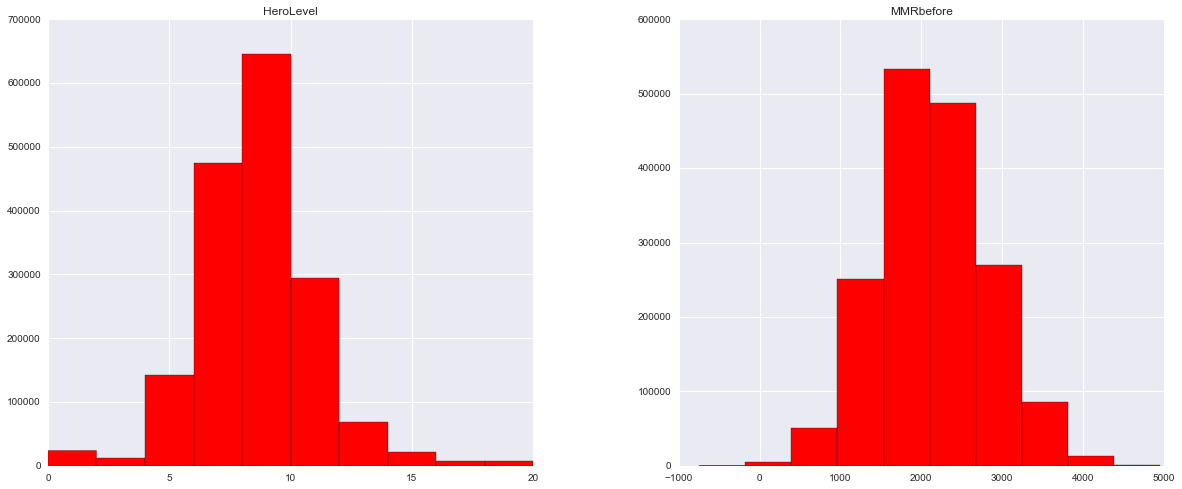

In [22]:
%matplotlib inline
DataFrame[["HeroLevel","MMRbefore"]].hist(figsize=(20, 8), color='red')
#plt.savefig("Histogram-Numeric-Features_HOTS.png")

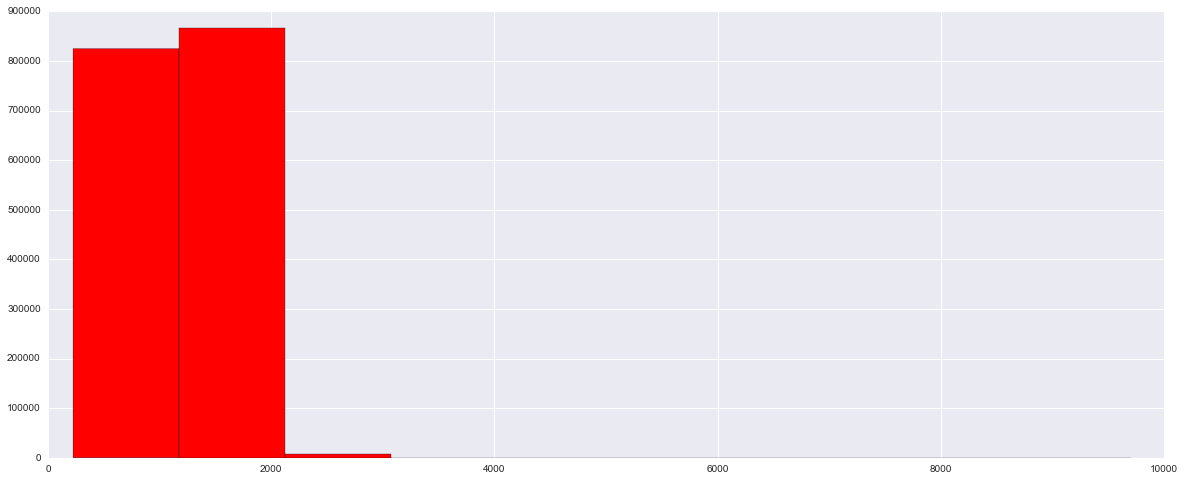

In [23]:
DataFrame["ReplayLength"].hist(figsize=(20, 8), color='red')

Removing outliers above a threshold of 3000 seconds gives a better representation of the spread of game duration

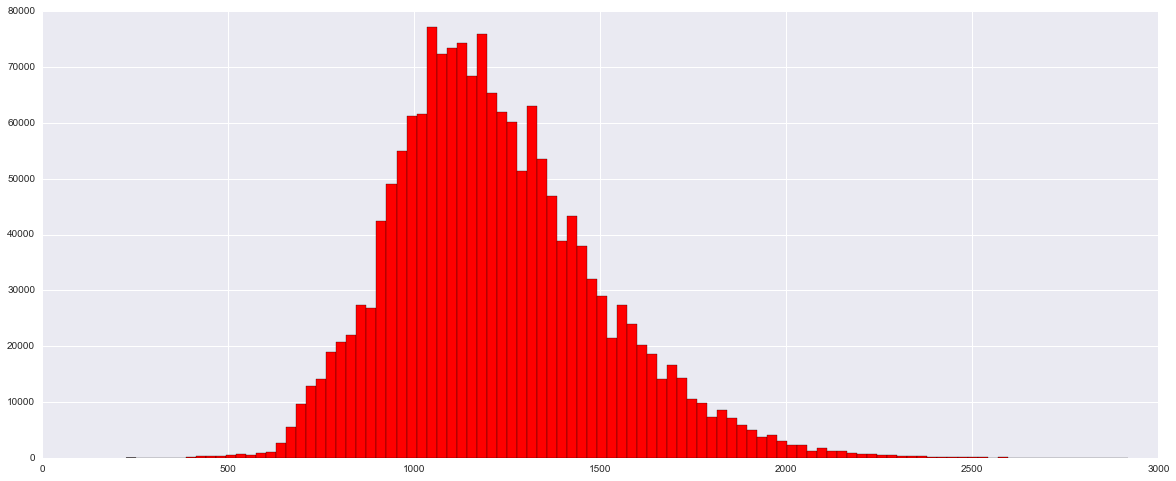

In [24]:
# Create a separate plot just to show the distribution of game length (removing lengthy outliers)
DataFrame["ReplayLength"][DataFrame.ReplayLength <= 3000].hist(figsize=(20, 8), color='red', bins=100)

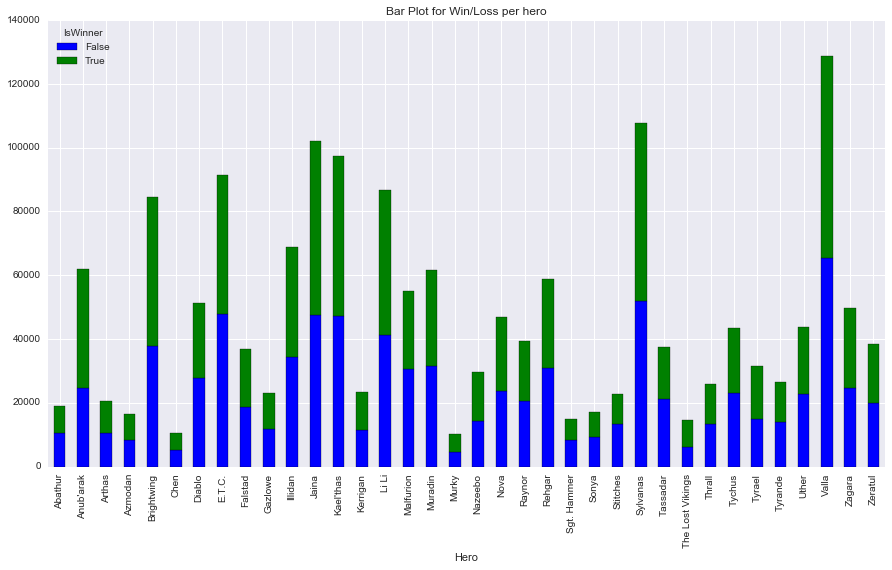

In [25]:
dfHero = DataFrame[["Hero", "IsWinner"]]
dfHero = dfHero.groupby(["Hero","IsWinner"])["Hero"].count().unstack('IsWinner')
dfHero.plot(kind="bar", stacked=True, figsize=(15,8), title="Bar Plot for Win/Loss per hero")

In [136]:
#Getting win rate in percentage per hero to plot in bar chart
dfGroup = DataFrame[["Hero", "IsWinner", "Group"]]

dfGroup = dfGroup.groupby(["Hero","IsWinner"]).count().unstack('IsWinner')

dfGroup.columns = ['Loss', 'Victory']
dfGroup.insert(0, 'WIN', dfGroup.Victory/(dfGroup.Loss+dfGroup.Victory)*100)

dfGroup.head()

,WIN,Loss,Victory
Hero,,,
Abathur,44.159771,10527,8325
Anub'arak,60.123523,24664,37187
Arthas,49.094823,10404,10034
Azmodan,50.340423,8242,8355
Brightwing,55.309735,37774,46750


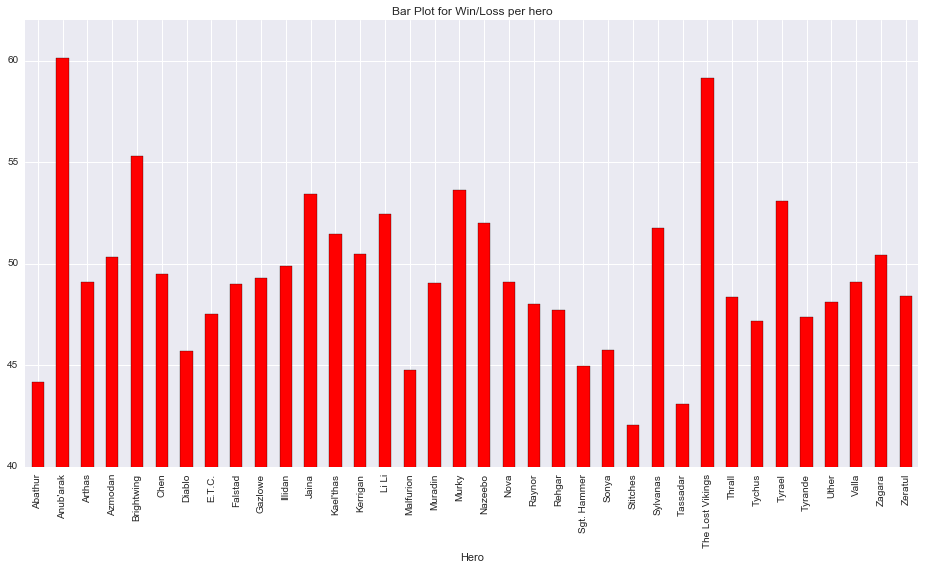

In [154]:
# DF_Map_Groups = pd.read_csv("HeroAndMap.csv")
# DF_Map_Groups.head()

# dfWinRate = pd.merge(dfGroup, DF_Map_Groups, left_on=["Group"], right_on=['Group'], how='left')

# if dfGroup.WIN.values > 50: 
#     y = 'blue'
# elif Group =='Support': 
#     y = 'green'
# elif Group == 'Assassin': 
#     y = 'red'
# elif Group == 'Warrior': 
#     y = 'yellow'
# else:
#     y= 'red'

# #DF_Replay[DF_Replay['GameMode'] == 4]
    

dfGroup['WIN'].plot(kind="bar", figsize=(16,8), ylim=(40,62), color='red', title="Bar Plot for Win/Loss per hero")

#  <u> Observations </u>
According to the graph above we can identify that the Heroes which are played the most are:  
- *Valla*   (Assassin) 
- *Sylvanas*    (Specialist)
- *Jaina*  (Assassin)
- *Kael'Thas*  (Assassin)
- *ETC*    (Warrior)

## Creating "Team Composition" feature from existing data

As mentioned above, this is one of the main features we wish to look at
- We begin by sorting our dataframe based on "ReplayID"
- With that in place, each record is then sorted by "IsWinner"
- This results in 10 entries for the same game being grouped together, where the first 5 are the winning team, and the second 5 are the losing team

In [ ]:
DataFrame.sort_values(["ReplayID","IsWinner"],axis=0, inplace=True, ascending=[True, False])

In [ ]:
DataFrame.head()

We want to extract two lists from each game: one from the winning team and one from the losing team

Each list will record the classes of characters present on that team. For example:

    Winner = ["Assassin", "Support", "Support", "Specialist", "Warrior"]

This list will then be sorted alphabetically and checked against a list of class compositions recorded so far. If that particular configuration is not present, it will be added. This allows us to see the unique team compositions present in our dataset.

In [ ]:
df_classes = DataFrame[["IsWinner", "ReplayID", "Group", "MMRbefore"]]
df_classes.shape

In [ ]:
df_classes.head()

## Note
**This cell may take a while to execute**

In [ ]:
# Initialise lists to keep track of the group of 5 classes (a.k.a. Team Composition) played in any given game
# Initialise another list to keep track of each of these lists of 5 classes
# Similar thing with MMR (a.k.a. Player Rating), but divide by 5 to get average player rating on the team
# Initialise a counter to 0, and cycle through every row in the dataframe
# The dataframe is sorted by ReplayID, so every 10 rows corresponds to 1 game
# Once counter reaches 10, reset the appropriate lists after adding their values to the larger lists

comp_win = []
comp_lose = []
composition_list = []
mmr_win = 0
mmr_lose = 0
mmr_list = []
counter = 0
for x in range(len(df_classes)):
    if df_classes.IsWinner.iloc[x] == True:
        comp_win.append(df_classes.Group.iloc[x])
        mmr_win += df_classes.MMRbefore.iloc[x]
    else:
        comp_lose.append(df_classes.Group.iloc[x])
        mmr_lose += df_classes.MMRbefore.iloc[x]
    counter += 1
    if counter == 10: # All values for a single game have been read, so now add them to lists
        comp_win.sort()
        comp_lose.sort()
        composition_list.append(comp_win)
        composition_list.append(comp_lose)
        comp_win = []
        comp_lose = []
        mmr_list.append(mmr_win//5)
        mmr_list.append(mmr_lose//5)
        mmr_win = 0
        mmr_lose = 0
        counter = 0 # Restart counter to represent next game
        
print("Finished")  

In [ ]:
# From the entire list of all Team Compositions played, create a list of only the unique ones
# This can then be used to create dummies that will be used to convey what Team Composition a particular team played
# Necessary for our logisitic regression

unique_comps = []
for item in composition_list:
    if item not in unique_comps:
        unique_comps.append(item)
        
# Check that every composition conisists of 5 Classes
for j in unique_comps:
    if len(j) != 5:
        print("Error")

At this point, every player record has an associated "Team Composition" showing the 5 classes that were chosen on their team that game.

This is in the form of a list. E.g. ["Assassin", "Support", "Support", "Specialist", "Warrior"]

As we will be creating a new feature based on this information, we attempt to increase readability by converting these lists to a string of letters, each representing a particular class

In [ ]:
# For compositions to be easily readable, we will convert every list of 5 classes to a string representation
# A = Assassin
# S = Support
# Sp = Specialist
# W = Warrior
# For example, the string AASpWW would represent ["Assassin", "Assassin", "Specialist", "Warrior", "Warrior"]
str_comps = []
for composition in composition_list:
    string_rep = "" # String to keep track of class initials
    for character_class in composition:
        if character_class == "Specialist": # 2 classes begin with "S", so represent Specialist as "Sp"
            string_rep += character_class[0:2]
        else:
            string_rep += character_class[0]
    str_comps.append(string_rep) # Add the composition to the list
    
# Check that formatting is as expected
print(str_comps[0:5])

In [ ]:
# Create a list that can be used as a pandas Series to add as a column to our dataframe
# The ratings calculated on a per-team basis, but at the moment we still have one row per player
# Therefore, create 5 of each entry
col_rating = []
for i in mmr_list:
    for j in range(5):
        col_rating.append(i)

In [ ]:
# Same as the previous cell, but for team composition
col_comp = []
for i in str_comps:
    for j in range(5):
        col_comp.append(i)

In [ ]:
# Add these columns to the dataframe
DataFrame['Composition'] = pd.Series(col_comp, index=DataFrame.index)
DataFrame['Rating'] = pd.Series(col_rating, index=DataFrame.index)

In [ ]:
DataFrame.head(20)

Finally, we remove duplicat entries so that we are left with 2 rows for each game, one for the winning team, and one for the losing team.

These records will also indicate the composition played by the team, and the average player rating.

In [ ]:
# Create a new dataframe that is to be modified to contain only a single record per team (i.e. 2 entries per game)
DF_Teams = DataFrame[["ReplayID", "Map", "ReplayLength", "IsWinner", "Composition", "Rating"]]

In [ ]:
# Perform drop on rows that do not have unqiue values for the pair "ReplayID" and "IsWinner"
DF_Teams.drop_duplicates(["ReplayID", "IsWinner"], inplace=True)
DF_Teams.head(20)

In [ ]:
# Write this to a csv file to be read as needed
DF_Teams.to_csv("Team_Info.csv")

In [ ]:
DF_Teams = pd.read_csv("Team_Info.csv")

## Modeling Data

We now attempt to generate a model that can be used to predict the outcome of a game, given one team's composition and the average player rating on that team.

Our goal is to determine if any particular combinations of character classes give you an advantage during the game, making a victory more likely.

From our initial analysis of the variety of compositions played, we established 56 combinations of character classes that were played.

We will create dummies for each of these, and use a "1" to indicate that that was the composition played by the team, and a "0" to indicate that it was not.

This is needed to perform the logistic regression using scikitlearn, where categorical string values are not permitted.

In [ ]:
# Drop the Unnamed index column
DF_Teams.drop("Unnamed: 0", inplace=True, axis=1)

# Create dummies for the Composition feature
dummy_comps = pd.get_dummies(DF_Teams["Composition"], prefix="COMP")

In [ ]:
# Convert the True and False values of "IsWinner" to 1 or 0
# This allows them to be used in the logisitic regression without error
DF_Teams["IsWinner"] = DF_Teams["IsWinner"].astype(int)

# Create a dataframe that is just the "IsWinner", "Rating", and dummy values
model_df = pd.concat([DF_Teams[["IsWinner", "Rating"]], dummy_comps], axis=1)
model_df.shape

In [ ]:
import numpy as np
# Set up intercept column
intercept = pd.DataFrame({'Intercept': np.ones(len(DF_Teams))})

# For our X matrix, we want all of the dummy columns for Composition, the Rating, and the Intercept
X = pd.concat([intercept, model_df.drop("IsWinner", axis=1)], axis=1)

# For our y vector, we just want the "IsWinner" feature (target feature)
y = model_df.IsWinner
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Perform our initial logisitic regression using just the "Rating" feature
model = LogisticRegression().fit(X[["Rating"]], y)
print("Coefficients: \n", model.coef_)

In [ ]:
# Get the probabilities that, given a particular team rating, the result will be a win or a loss
model.predict_proba(X[["Rating"]])

In [ ]:
# Based on this model, attempt to correctly predict the "IsWinner" feature
predictions = model.predict(X[["Rating"]])
print("Predictions: ", predictions)

In [ ]:
# Get the score, indicating the percentage of times that our model correctly predits the outcome
model.score(X[["Rating"]], y)

In [ ]:
from sklearn import metrics

# Get more detailed information
print("Accuracy: ", metrics.accuracy_score(model_df['IsWinner'], predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(model_df['IsWinner'], predictions))
print("Classification report:\n ", metrics.classification_report(model_df['IsWinner'], predictions))

## Normalise continuous feature "Rating"

"Rating" is a continuous feature with no set range.

Here we normalise it so that the lowest value is represented as -1, andthe highest value is represented as +1

Everything in between is adjusted accordingly.

In [ ]:
df_cont = DF_Teams["Rating"]
df_norm = (df_cont - df_cont.min()) / (df_cont.max() - df_cont.min())
df_norm = df_norm * 2 - 1
df_norm.head()

In [ ]:
# Create dataframe as before, with intercept, but replacing the rating values
no_rating = model_df.drop("Rating", axis=1)
DF_Normalised = pd.concat([intercept, df_norm, no_rating], axis=1)
DF_Normalised.head(10)

In [ ]:
# Set up X and y again
X2 = DF_Normalised.drop("IsWinner", axis=1)
y2 = DF_Teams.IsWinner

logreg = LogisticRegression().fit(X2, y2)
print(logreg.coef_)

In [ ]:
# Run predictions again
predictions2 = logreg.predict(X2)
print("Predictions: ", predictions2)

In [ ]:
# Print information on results
print("Accuracy: ", metrics.accuracy_score(DF_Normalised['IsWinner'], predictions2))
print("Confusion matrix: \n", metrics.confusion_matrix(DF_Normalised['IsWinner'], predictions2))
print("Classification report:\n ", metrics.classification_report(DF_Normalised['IsWinner'], predictions2))

## Beginning looking at maps

In [ ]:
DataFrame.shape

In [ ]:
DataFrame[DataFrame.Map == 'Haunted Mines'].count()
# DataFrame[DataFrame.Map == "Sky Temple"].count()

In [ ]:
DataFrame.Map.unique()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Garden of Terror Map

In [ ]:
GardenTerror = DataFrame[DataFrame['Map'] == 'Garden of Terror']
GardenTerror.shape

In [ ]:
GardenTerror.ReplayLength.shape

In [ ]:
# Prepare an intercept term that adds a 1 to each example.
# Scikit-learn does not use an intercept by default.
intercept = pd.DataFrame({'Intercept': np.ones(len(GardenTerror))})
intercept.head()

In [ ]:
print(GardenTerror.shape)
GardenTerror = GardenTerror.iloc[:5000]
print(GardenTerror.shape)

# Prepare the descriptive features
X = pd.concat([intercept, GardenTerror[['IsWinner', 'Hero']]], axis=1)
y = GardenTerror.IsWinner
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

In [ ]:
#Create dummy values for Winner feature
GardenTerror_IsWinner = pd.get_dummies(GardenTerror['IsWinner'])

#GardenTerror_IsWinner.head()

Winner_new = pd.concat([GardenTerror, GardenTerror_IsWinner], axis=1)

Winner_new.columns = ['ReplayID', 'Map', 'ReplayLength', 'Hero', 'HeroLevel', 'IsWinner', 'MMRbefore', 'Group','Composition', 'Rating', 'Loser', 'Winner']

Winner_new.head(10)

In [ ]:
#import the needed module
import statsmodels.formula.api as sm

logreg = sm.logit(formula="Winner ~ Rating", data= Winner_new[['Winner', 'Rating']]).fit()

# Print the model weights/parameters
print(logreg.params)

In [ ]:
X_minmax = pd.DataFrame({'Rating': [Winner_new.Rating.min(), Winner_new.Rating.max()]})

predictions = logreg.predict(Winner_new)

# First, plot the observed data
Winner_new.plot(kind='scatter', x='Rating', y='IsWinner')

# Next, plot the logistic regression estimation, in red.
plt.plot(Winner_new.ReplayLength, predictions, c='red', linewidth=2)

# Plot the linear decision surface estimated by logistic regression
plt.plot(X_minmax, logreg.predict(X_minmax), c='blue', linewidth=1, linestyle='dashed')

# Sky Temple Map

In [ ]:
SkyTemple = DataFrame.loc[DataFrame['Map'] == 'Sky Temple']

intercept = pd.DataFrame({'Intercept': np.ones(len(SkyTemple))})
intercept.head()

SkyTemple = SkyTemple.iloc[:5000]

# Prepare the descriptive features
X = pd.concat([intercept, SkyTemple[['IsWinner', 'Hero']]], axis=1)
y = SkyTemple.IsWinner

SkyTemple_IsWinner = pd.get_dummies(SkyTemple['IsWinner'])
Winner_Sky = pd.concat([SkyTemple, SkyTemple_IsWinner], axis=1)
Winner_Sky.columns = ['ReplayID', 'Map', 'ReplayLength', 'Hero', 'HeroLevel', 'IsWinner', 'MMRbefore', 'Group','Composition', 'Rating', 'Loser', 'Winner']

logreg = sm.logit(formula="Winner ~ Rating", data= Winner_Sky[['Winner', 'Rating']]).fit()

# Print the model weights/parameters
print(logreg.params)

X_minmax = pd.DataFrame({'Rating': [Winner_Sky.Rating.min(), Winner_Sky.Rating.max()]})

predictions = logreg.predict(Winner_Sky)

# First, plot the observed data
Winner_Sky.plot(kind='scatter', x='Rating', y='IsWinner')
# Next, plot the logistic regression estimation, in red.
plt.plot(Winner_Sky.ReplayLength, predictions, c='red', linewidth=2)
# Plot the linear decision surface estimated by logistic regression
plt.plot(X_minmax, logreg.predict(X_minmax), c='blue', linewidth=1, linestyle='dashed')

# Dragon Shire Map

In [ ]:
DragonShire = DataFrame.loc[DataFrame['Map'] == 'Dragon Shire']

intercept = pd.DataFrame({'Intercept': np.ones(len(DragonShire))})

DragonShire = DragonShire.iloc[:5000]

# Prepare the descriptive features
X = pd.concat([intercept, DragonShire[['IsWinner', 'Hero']]], axis=1)
y = DragonShire.IsWinner

DragonShire_IsWinner = pd.get_dummies(DragonShire['IsWinner'])
Winner_Dragon = pd.concat([DragonShire, DragonShire_IsWinner], axis=1)
Winner_Dragon.columns = ['ReplayID', 'Map', 'ReplayLength', 'Hero', 'HeroLevel', 'IsWinner', 'MMRbefore', 'Group','Composition', 'Rating', 'Loser', 'Winner']

logreg = sm.logit(formula="Winner ~ Rating", data= Winner_Dragon[['Winner', 'Rating']]).fit()

# Print the model weights/parameters
print(logreg.params)

X_minmax = pd.DataFrame({'Rating': [Winner_Dragon.Rating.min(), Winner_Dragon.Rating.max()]})

predictions = logreg.predict(Winner_Sky)

# First, plot the observed data
Winner_Dragon.plot(kind='scatter', x='Rating', y='IsWinner')
# Next, plot the logistic regression estimation, in red.
plt.plot(Winner_Dragon.ReplayLength, predictions, c='red', linewidth=2)
# Plot the linear decision surface estimated by logistic regression
plt.plot(X_minmax, logreg.predict(X_minmax), c='blue', linewidth=1, linestyle='dashed')

# Blackheart's Bay Map

In [ ]:
BlackheartsBay = DataFrame.loc[DataFrame['Map'] == "Blackheart's Bay"]

intercept = pd.DataFrame({'Intercept': np.ones(len(BlackheartsBay))})

BlackheartsBay = BlackheartsBay.iloc[:5000]

# Prepare the descriptive features
X = pd.concat([intercept, BlackheartsBay[['IsWinner', 'Hero']]], axis=1)
y = BlackheartsBay.IsWinner

BlackheartsBay_IsWinner = pd.get_dummies(BlackheartsBay['IsWinner'])
Winner_Bay = pd.concat([BlackheartsBay, BlackheartsBay_IsWinner], axis=1)
Winner_Bay.columns = ['ReplayID', 'Map', 'ReplayLength', 'Hero', 'HeroLevel', 'IsWinner', 'MMRbefore', 'Group','Composition', 'Rating', 'Loser', 'Winner']

logreg = sm.logit(formula="Winner ~ Rating", data= Winner_Bay[['Winner', 'Rating']]).fit()

# Print the model weights/parameters
print(logreg.params)

X_minmax = pd.DataFrame({'Rating': [Winner_Bay.Rating.min(), Winner_Bay.Rating.max()]})

predictions = logreg.predict(Winner_Bay)

# First, plot the observed data
Winner_Bay.plot(kind='scatter', x='Rating', y='IsWinner')
# Next, plot the logistic regression estimation, in red.
plt.plot(Winner_Bay.ReplayLength, predictions, c='red', linewidth=2)
# Plot the linear decision surface estimated by logistic regression
plt.plot(X_minmax, logreg.predict(X_minmax), c='blue', linewidth=1, linestyle='dashed')

# Spider Queen Map

In [ ]:
SpiderQueen = DataFrame.loc[DataFrame['Map'] == 'Tomb of the Spider Queen']

intercept = pd.DataFrame({'Intercept': np.ones(len(SpiderQueen))})

SpiderQueen = SpiderQueen.iloc[:5000]

# Prepare the descriptive features
X = pd.concat([intercept, SpiderQueen[['IsWinner', 'Hero']]], axis=1)
y = SpiderQueen.IsWinner

SpiderQueen_IsWinner = pd.get_dummies(SpiderQueen['IsWinner'])
Winner_Spider = pd.concat([SpiderQueen, SpiderQueen_IsWinner], axis=1)
Winner_Spider.columns = ['ReplayID', 'Map', 'ReplayLength', 'Hero', 'HeroLevel', 'IsWinner', 'MMRbefore', 'Group','Composition', 'Rating', 'Loser', 'Winner']

logreg = sm.logit(formula="Winner ~ Rating", data= Winner_Spider[['Winner', 'Rating']]).fit()

# Print the model weights/parameters
print(logreg.params)

X_minmax = pd.DataFrame({'Rating': [Winner_Spider.Rating.min(), Winner_Spider.Rating.max()]})

predictions = logreg.predict(Winner_Spider)

# First, plot the observed data
Winner_Spider.plot(kind='scatter', x='Rating', y='IsWinner')
# Next, plot the logistic regression estimation, in red.
plt.plot(Winner_Spider.ReplayLength, predictions, c='red', linewidth=2)
# Plot the linear decision surface estimated by logistic regression
plt.plot(X_minmax, logreg.predict(X_minmax), c='blue', linewidth=1, linestyle='dashed')

# Cursed Hollow Map

In [ ]:
CursedHollow = DataFrame.loc[DataFrame['Map'] == 'Cursed Hollow']

intercept = pd.DataFrame({'Intercept': np.ones(len(CursedHollow))})

CursedHollow = CursedHollow.iloc[:5000]

# Prepare the descriptive features
X = pd.concat([intercept, CursedHollow[['IsWinner', 'Hero']]], axis=1)
y = CursedHollow.IsWinner

CursedHollow_IsWinner = pd.get_dummies(CursedHollow['IsWinner'])
Winner_Hollow = pd.concat([CursedHollow, CursedHollow_IsWinner], axis=1)
Winner_Hollow.columns = ['ReplayID', 'Map', 'ReplayLength', 'Hero', 'HeroLevel', 'IsWinner', 'MMRbefore', 'Group','Composition', 'Rating', 'Loser', 'Winner']

logreg = sm.logit(formula="Winner ~ Rating", data= Winner_Hollow[['Winner', 'Rating']]).fit()

# Print the model weights/parameters
print(logreg.params)

X_minmax = pd.DataFrame({'Rating': [Winner_Hollow.Rating.min(), Winner_Hollow.Rating.max()]})

predictions = logreg.predict(Winner_Hollow)

# First, plot the observed data
Winner_Hollow.plot(kind='scatter', x='Rating', y='IsWinner')
# Next, plot the logistic regression estimation, in red.
plt.plot(Winner_Hollow.ReplayLength, predictions, c='red', linewidth=2)
# Plot the linear decision surface estimated by logistic regression
plt.plot(X_minmax, logreg.predict(X_minmax), c='blue', linewidth=1, linestyle='dashed')

# Haunted Mines Map

In [ ]:
HauntedMines = DataFrame[DataFrame['Map'] == 'Haunted Mines']

intercept = pd.DataFrame({'Intercept': np.ones(len(HauntedMines))})

HauntedMines = HauntedMines.iloc[:5000]

# Prepare the descriptive features
X = pd.concat([intercept, HauntedMines[['IsWinner', 'Hero']]], axis=1)
y = HauntedMines.IsWinner

HauntedMines_IsWinner = pd.get_dummies(HauntedMines['IsWinner'])
Winner_Mines = pd.concat([HauntedMines, HauntedMines_IsWinner], axis=1)
Winner_Mines.columns = ['ReplayID', 'Map', 'ReplayLength', 'Hero', 'HeroLevel', 'IsWinner', 'MMRbefore', 'Group','Composition', 'Rating', 'Loser', 'Winner']

logreg = sm.logit(formula="Winner ~ Rating", data= Winner_Mines[['Winner', 'Rating']]).fit()

# Print the model weights/parameters
print(logreg.params)

X_minmax = pd.DataFrame({'Rating': [Winner_Mines.Rating.min(), Winner_Mines.Rating.max()]})

predictions = logreg.predict(Winner_Mines)

# First, plot the observed data
Winner_Mines.plot(kind='scatter', x='Rating', y='IsWinner')
# Next, plot the logistic regression estimation, in red.
plt.plot(Winner_Mines.ReplayLength, predictions, c='red', linewidth=2)
# Plot the linear decision surface estimated by logistic regression
plt.plot(X_minmax, logreg.predict(X_minmax), c='blue', linewidth=1, linestyle='dashed')

## 1. Determine the most played heroes in each category:
After looking at the most played 7 Heroes in the games accross the data set here are the results
* Support  
Brightwing  
Lili
  
  
* Assassin  
Valla  
Jaina  
-Kael'Thas
  
  
* Warrior  
E.T.C

  
* Specialist  
Sylvanas

#### Now looking at the win rate of individual heroes we see that the top 7 are as follows:
* Support  
Brightwing
  
  
* Assassin  
Jaina
  
  
* Warrior  
Anub'Arak  
Tyrael

  
* Specialist  
The Lost Vikings  
Sylvanas  
Murky


In the end only 3 out of the 7 most played heroes turn out to have the highest win rate.
This leads to the need to understand team composition in order to see how they can be a predictor of the outcome of a game.

## 2. Identify an various team compositions played

## 3. Study the effect of team rating on the outcome of the game?

## 4. Is the team composition affecting the outcome of the game?